# 可视化分类数据

在[绘制关系图](relational.html#relational-tutorial)的教程中，我们学习了如何使用不同的可视化方法来展示数据集中多个变量之间的关系。在示例中，我们专注于两个数值变量之间的主要关系。如果其中一个主要变量是“可分类的”（能被分为不同的组），那么我们可以使用更专业的可视化方法。

在 seaborn 中，有几种不同的方法可以对分类数据进行可视化。类似于[`relplot()`](../generated/seaborn.relplot.html#seaborn.relplot "seaborn.relplot")与[`scatterplot()`](../generated/seaborn.scatterplot.html#seaborn.scatterplot "seaborn.scatterplot")或者[`lineplot()`](../generated/seaborn.lineplot.html#seaborn.lineplot "seaborn.lineplot")之间的关系，有两种方法可以制作这些图。有许多 axes-level 函数可以用不同的方式绘制分类数据，还有一个 figure-level 接口[`catplot()`](../generated/seaborn.catplot.html#seaborn.catplot "seaborn.catplot")，可以对它们进行统一的高级访问。

将不同的分类图类型视为三个不同的家族，这是很有帮助的。下面我们将详细讨论，它们是：

分类散点图：

*   [`stripplot()`](../generated/seaborn.stripplot.html#seaborn.stripplot "seaborn.stripplot") (with `kind="strip"`; the default)
*   [`swarmplot()`](../generated/seaborn.swarmplot.html#seaborn.swarmplot "seaborn.swarmplot") (with `kind="swarm"`)

分类分布图：

*   [`boxplot()`](../generated/seaborn.boxplot.html#seaborn.boxplot "seaborn.boxplot") (with `kind="box"`)
*   [`violinplot()`](../generated/seaborn.violinplot.html#seaborn.violinplot "seaborn.violinplot") (with `kind="violin"`)
*   [`boxenplot()`](../generated/seaborn.boxenplot.html#seaborn.boxenplot "seaborn.boxenplot") (with `kind="boxen"`)

分类估计图：

*   [`pointplot()`](../generated/seaborn.pointplot.html#seaborn.pointplot "seaborn.pointplot") (with `kind="point"`)
*   [`barplot()`](../generated/seaborn.barplot.html#seaborn.barplot "seaborn.barplot") (with `kind="bar"`)
*   [`countplot()`](../generated/seaborn.countplot.html#seaborn.countplot "seaborn.countplot") (with `kind="count"`)

这些家族使用不同的粒度级别来表示数据，我们应该根据实际情况来决定到底要使用哪个。它们有统一的 API，所以我们可以轻松地在不同类型之间进行切换，并从多个角度来观察数据。

在本教程中，我们主要关注 figure-level 接口[`catplot()`](../generated/seaborn.catplot.html#seaborn.catplot "seaborn.catplot")。这个函数是上述每个函数更高级别的接口，因此当我们显示每种绘图时都会引用它们，不清楚的话可以随时查看特定类型的 API 文档。

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

## 分类散点图

在[`catplot()`](../generated/seaborn.catplot.html#seaborn.catplot "seaborn.catplot")中，数据默认使用散点图表示。在 seaborn 中有两种不同的分类散点图，它们采用不同的方法来表示分类数据。 其中一种是属于一个类别的所有点，将沿着与分类变量对应的轴落在相同位置。[`stripplot()`](../generated/seaborn.stripplot.html#seaborn.stripplot "seaborn.stripplot")方法是[`catplot()`](../generated/seaborn.catplot.html#seaborn.catplot "seaborn.catplot")中 kind 的默认参数，它是用少量随机“抖动”调整分类轴上的点的位置：

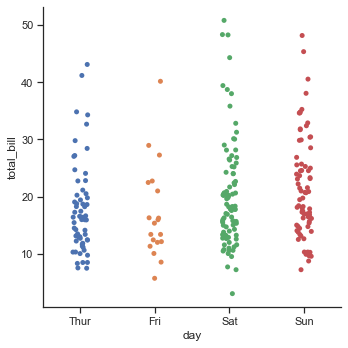

In [2]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips);

`jitter`参数控制抖动的大小，你也可以完全禁用它：

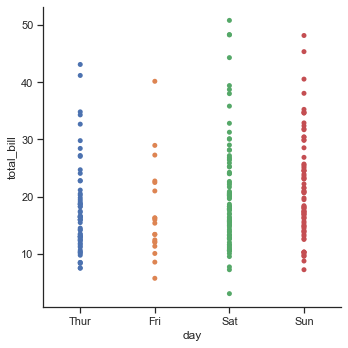

In [3]:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips);

另一种方法使用防止它们重叠的算法沿着分类轴调整点。我们可以用它更好地表示观测分布，但是只适用于相对较小的数据集。这种绘图有时被称为“beeswarm”，可以使用 seaborn 中的[`swarmplot()`](../generated/seaborn.swarmplot.html#seaborn.swarmplot "seaborn.swarmplot")绘制，通过在[`catplot()`](../generated/seaborn.catplot.html#seaborn.catplot "seaborn.catplot")中设置`kind="swarm"`来激活：

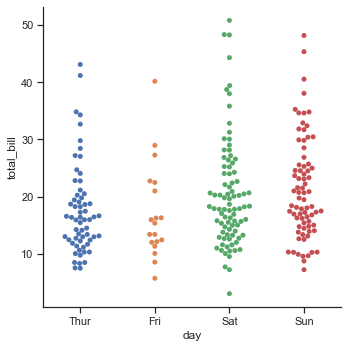

In [4]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

与关系图类似，可以通过使用`hue`语义向分类图添加另一个维。（分类图当前不支持`size`和`style`语义 ）。 每个不同的分类绘图函数以不同方式处理`hue` 语义。对于散点图，我们只需要更改点的颜色：

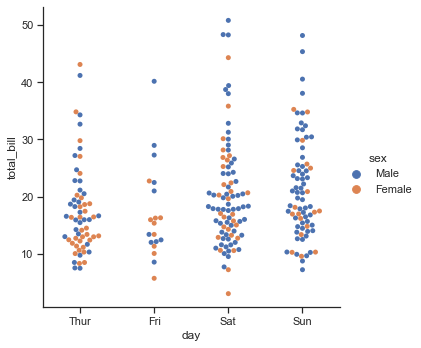

In [5]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

与数值数据不同，如何沿着轴顺序排列分类变量并不总是显而易见的。通常，seaborn 分类绘图函数试图从数据中推断出类别的顺序。 如果您的数据具有 pandas 中的`Categorical`数据类型，则可以在此处设置类别的默认顺序。如果传递给分类轴的变量看起来是数字，则将对级别进行排序。但是数据仍然被视为分类并在分类轴上的序数位置（特别是 0，1，......）处理，即使用数字来标记它们：

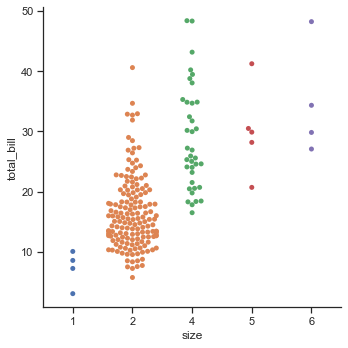

In [6]:
sns.catplot(x="size", y="total_bill", kind="swarm",
            data=tips.query("size != 3"));

选择默认排序的另一个选项是获取数据集中出现的类别级别。也可以使用`order`参数在特定图表的基础上控制排序。在同一图中绘制多个分类图时，这很重要，我们将在下面看到更多：

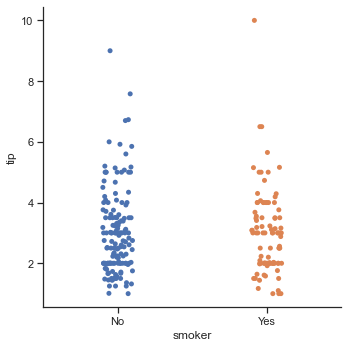

In [7]:
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips);

我们已经提到了“分类轴”的概念。在这些示例中，它始终对应于水平轴。但是将分类变量放在垂直轴上通常很有帮助（特别是当类别名称相对较长或有许多类别时）。为此，我们交换轴上的变量赋值：

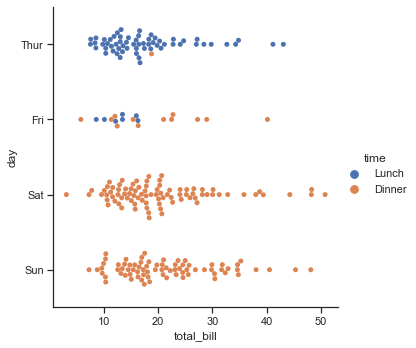

In [8]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips);

## 类别内观察点的分布

随着数据集的大小增加，分类散点图中每个类别可以提供的值分布信息受到限制。当发生这种情况时，有几种方法可以总结分布信息，以便于我们可以跨分类级别进行简单比较。

### 箱线图

第一个是熟悉的[`boxplot()`](../generated/seaborn.boxplot.html#seaborn.boxplot "seaborn.boxplot")。它可以显示分布的三个四分位数值以及极值。“胡须”延伸到位于下四分位数和上四分位数的 1.5 IQR 内的点，超出此范围的观察值会独立显示。这意味着箱线图中的每个值对应于数据中的实际观察值。

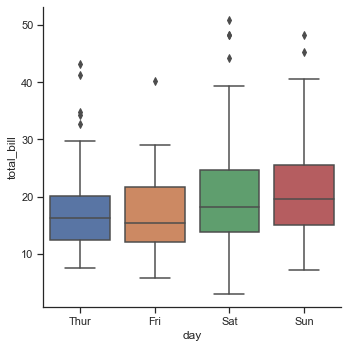

In [9]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

添加`hue`语义, 语义变量的每个级别的框沿着分类轴移动，因此它们将不会重叠：

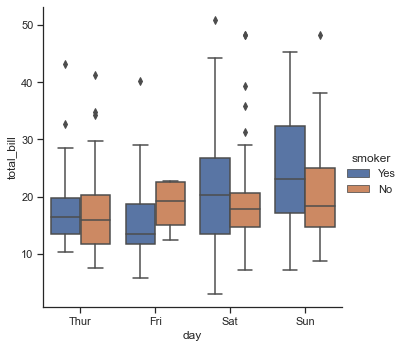

In [10]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

此行为被称为“dodging”，默认开启，因为我们假定语义变量嵌套在主分类变量中。如果不是这样，可以禁用 dodging：

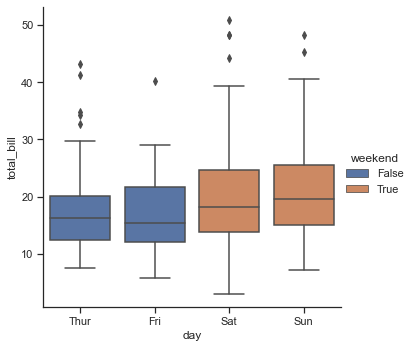

In [11]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False, data=tips);

一个相关的函数[`boxenplot()`](../generated/seaborn.boxenplot.html#seaborn.boxenplot "seaborn.boxenplot")可以绘制一个与 Box-plot 类似的图。它为了显示更多信息而对分布的形状进行了优化，比较适合于较大的数据集：

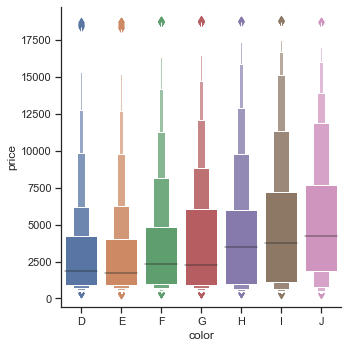

In [12]:
diamonds = sns.load_dataset("diamonds")
sns.catplot(x="color", y="price", kind="boxen",
            data=diamonds.sort_values("color"));

### 小提琴图

另一种方法是[`violinplot()`](../generated/seaborn.violinplot.html#seaborn.violinplot "seaborn.violinplot")，它将箱线图与[分布](distributions.html#distribution-tutorial)教程中描述的核密度估算程序结合起来：

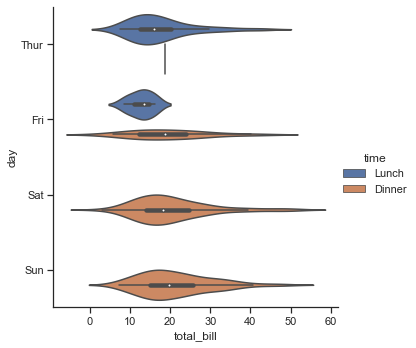

In [13]:
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", data=tips);

该方法使用核密度估计来提供更丰富的值分布描述。此外，violin 中还显示了来自箱线图的四分位数和 whikser 值。缺点是由于 violinplot 使用了 KDE，我们需要调整一些额外参数，与箱形图相比增加了一些复杂性：

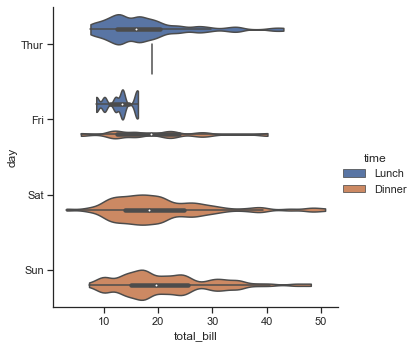

In [14]:
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", bw=.15, cut=0,
            data=tips);

当 hue 参数只有两个级别时，也可以“拆分”violins，这样可以更有效地利用空间：

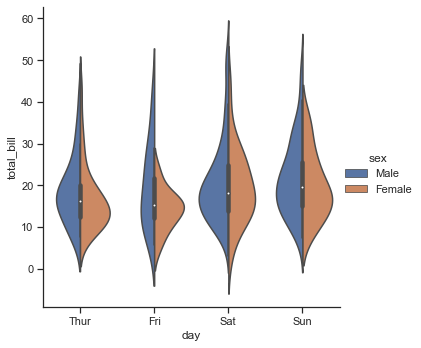

In [15]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips);

最后，在 violin 内的绘图有几种选项，包括显示每个独立的观察而不是摘要箱线图值的方法：

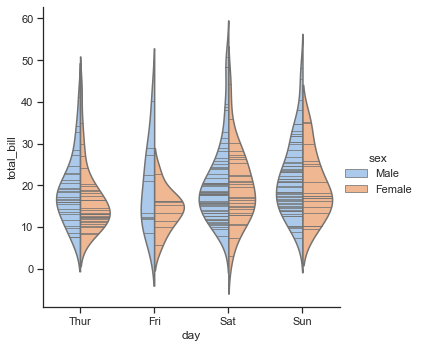

In [16]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips);

我们也可以将[`swarmplot()`](../generated/seaborn.swarmplot.html#seaborn.swarmplot "seaborn.swarmplot")或`striplot()`与箱形图或 violin plot 结合起来，展示每次观察以及分布摘要：

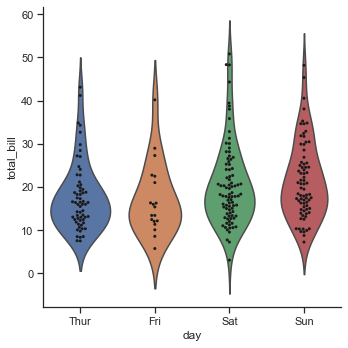

In [17]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax);

## 类别内的统计估计

对于其他应用程序，你可能希望显示值的集中趋势估计，而不是显示每个类别中的分布。Seaborn 有两种主要方式来显示这些信息。重要的是，这些功能的基本 API 与上面讨论的 API 相同。

### 条形图

实现这一目标的是我们熟悉的条形图。在 seaborn 中，[`barplot()`](../generated/seaborn.barplot.html#seaborn.barplot "seaborn.barplot")函数在完整数据集上运行并应用函数来获取估计值（默认情况下取平均值）。当每个类别中有多个观察值时，它还使用自举来计算估计值周围的置信区间，并使用误差条绘制：

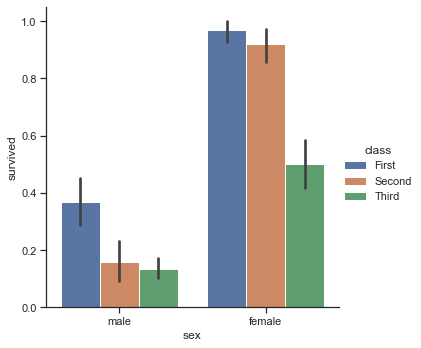

In [18]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

条形图的一个特例是，当你想要显示每个类别中的观察数量而不是计算第二个变量的统计数据时。这类似于分类而非定量变量的直方图。在 seaborn 中，使用[`countplot()`](../generated/seaborn.countplot.html#seaborn.countplot "seaborn.countplot")函数很容易实现：

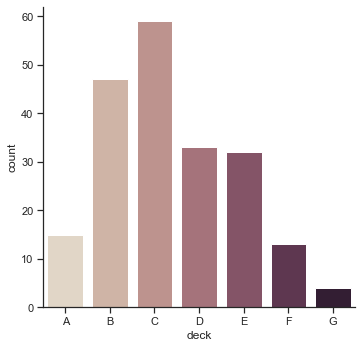

In [19]:
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic);

无论是[`barplot()`](../generated/seaborn.barplot.html#seaborn.barplot "seaborn.barplot")还是[`countplot()`](../generated/seaborn.countplot.html#seaborn.countplot "seaborn.countplot")，都可以使用上面讨论的所有选项，也可以调用每个函数的文档示例中的其他选项：

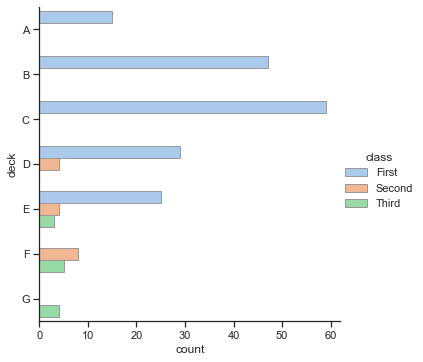

In [20]:
sns.catplot(y="deck", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic);

### 点图

[`pointplot()`](../generated/seaborn.pointplot.html#seaborn.pointplot "seaborn.pointplot")函数提供了另一种可视化相同信息的样式。此函数还对另一个轴上的高度估计值进行编码，但不是显示一个完整的条形图，而是绘制点估计值和置信区间。另外，[`pointplot()`](../generated/seaborn.pointplot.html#seaborn.pointplot "seaborn.pointplot")连接来自相同`hue`类别的点。我们可以很容易的看出主要关系如何随着色调语义的变化而变化，因为人类的眼睛很擅长观察斜率的差异：

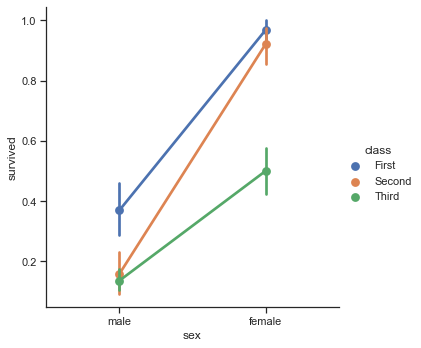

In [21]:
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic);

当分类函数缺少关系函数中的`style`语义时, 将 markers 和 linestyles 与色调一起改变，以制作最大可访问的图形并在黑白中重现良好，这仍然是一个好主意：

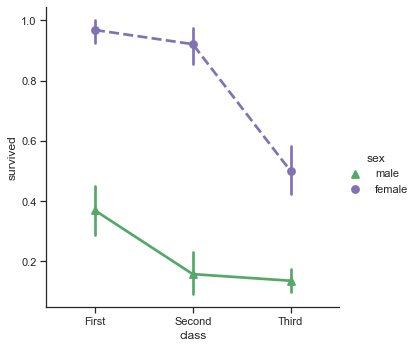

In [22]:
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic);

## 绘制“宽格式”数据

虽然优选使用“长形式”或“整齐”数据，但这些函数也可以应用于各种“宽格式”的数据，包括 pandas DataFrames 或二维 numpy 数组。这些对象应该直接传递给`data`参数： 

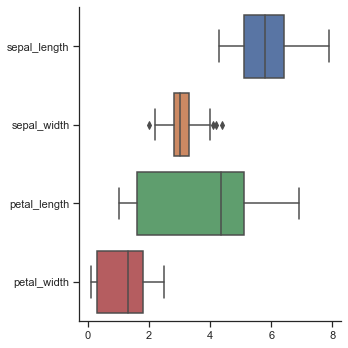

In [23]:
iris = sns.load_dataset("iris")
sns.catplot(data=iris, orient="h", kind="box");

另外，axes-level 函数接受 Pandas 或 numpy 对象的向量，而不是`DataFrame`中的变量：

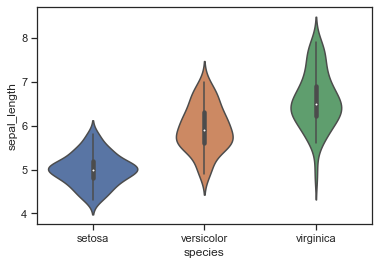

In [24]:
sns.violinplot(x=iris.species, y=iris.sepal_length);

要控制上面讨论的函数绘制的图形的大小和形状，你必须使用 matplotlib 命令来进行设置：

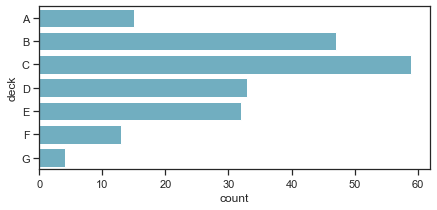

In [25]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="c");

当你需要一个分类图与一个更复杂的其他类型的图共存时，你可以采取这种方法。

## 显示与 facet 的多种关系

就像[`relplot()`](../generated/seaborn.relplot.html#seaborn.relplot "seaborn.relplot")一样, [`catplot()`](../generated/seaborn.catplot.html#seaborn.catplot "seaborn.catplot")建立在[`FacetGrid`](../generated/seaborn.FacetGrid.html#seaborn.FacetGrid "seaborn.FacetGrid")上，这意味着很容易添加层面变量来可视化高维关系：

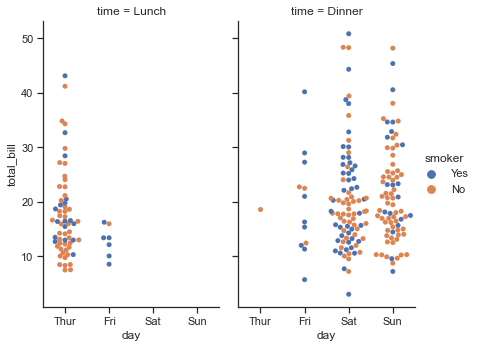

In [26]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=tips);

要进一步自定义绘图，我们可以使用它返回的[`FacetGrid`](../generated/seaborn.FacetGrid.html#seaborn.FacetGrid "seaborn.FacetGrid")对象上的方法：

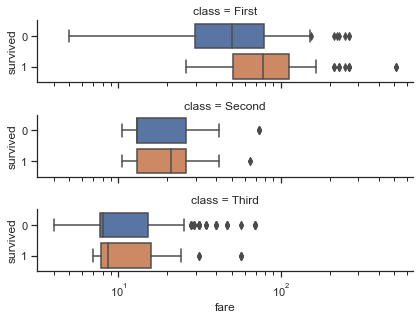

In [27]:
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))
g.set(xscale="log");